In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

from imblearn.over_sampling import SMOTE

In [ ]:
loan_df = pd.read_csv('loan_approval_dataset.csv')

In [ ]:
loan_df.columns = loan_df.columns.str.strip().str.lower()
print("Loan dataset missing:\n", loan_df.isnull().sum())
loan_df.fillna(method='ffill', inplace=True)

Loan dataset missing:
 loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


/tmp/ipython-input-21-3677983781.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  loan_df.fillna(method='ffill', inplace=True)


In [ ]:
# 4. Encode categorical features
label_enc = LabelEncoder()

cat_cols = loan_df.select_dtypes(include='object').columns.tolist()

# Drop 'loan_status' from encoding if it's in cat_cols
if 'loan_status' in cat_cols:
    cat_cols.remove('loan_status')

# Apply Label Encoding
for col in cat_cols:
    loan_df[col] = label_enc.fit_transform(loan_df[col].astype(str))

# Encode target variable
loan_df['loan_status'] = label_enc.fit_transform(loan_df['loan_status'].astype(str))  # Approved = 1, Rejected = 0

In [ ]:
# 5. Feature/target split
X = loan_df.drop(['loan_id', 'loan_status'], axis=1)
y = loan_df['loan_status']

In [ ]:
# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# 7. Handle class imbalance with SMOTE
print("Before SMOTE:", np.bincount(y_train))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("After SMOTE:", np.bincount(y_res))

Before SMOTE: [2125 1290]
After SMOTE: [2125 2125]


In [ ]:
# 8. Standardize features (for Logistic Regression)
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 9. Train models
# --- Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_res, y_res)
rf_pred = rf.predict(X_test)

# --- Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_res_scaled, y_res)
lr_pred = lr.predict(X_test_scaled)

# --- Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_res, y_res)
dt_pred = dt.predict(X_test)

In [ ]:
# 10. Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Classification Report:")
    print(classification_report(y_true, y_pred, target_names=['Rejected', 'Approved']))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Random Forest Classification Report:
              precision    recall  f1-score   support

    Rejected       0.98      0.99      0.98       531
    Approved       0.98      0.96      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



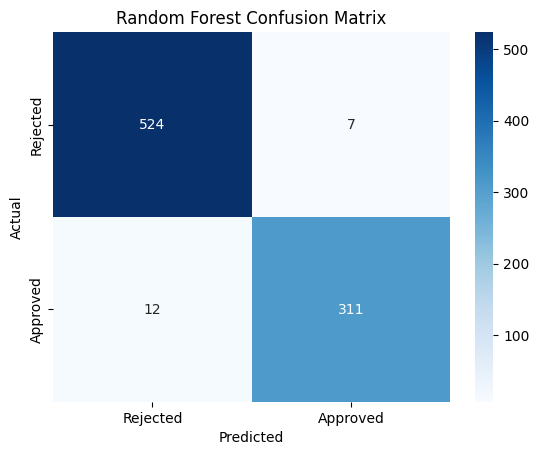

In [ ]:
evaluate_model("Random Forest", y_test, rf_pred)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Rejected       0.94      0.94      0.94       531
    Approved       0.91      0.90      0.91       323

    accuracy                           0.93       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.93      0.93      0.93       854



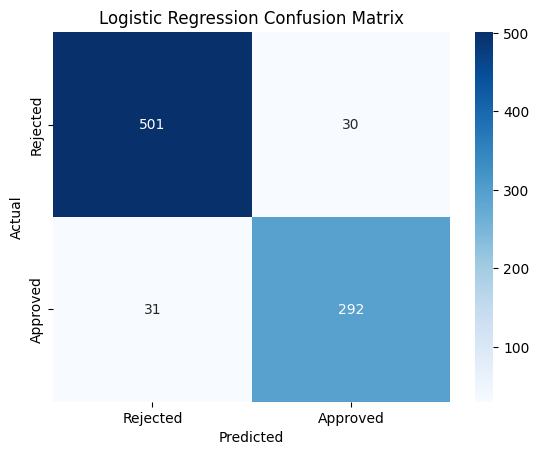

In [ ]:
evaluate_model("Logistic Regression", y_test, lr_pred)


Decision Tree Classification Report:
              precision    recall  f1-score   support

    Rejected       1.00      0.97      0.98       531
    Approved       0.95      0.99      0.97       323

    accuracy                           0.98       854
   macro avg       0.97      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



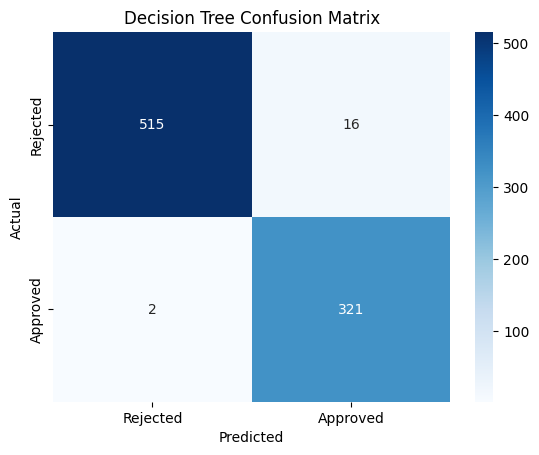

In [ ]:
evaluate_model("Decision Tree", y_test, dt_pred)